# CNN on MINST Dataset

In [3]:
# importing required libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import matplotlib.pyplot as plt

# Loading Dataset

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
y_train.shape

(60000,)

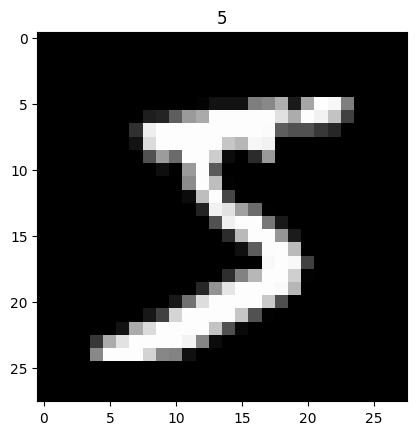

In [33]:
plt.imshow(x_train[0], cmap='grey')
plt.title(f'{y_train[0]}')
plt.show()

In [34]:
x_train[0].max()

np.uint8(255)

In [35]:
# normalize the dataset

x_train, x_test = x_train/255.0, x_test/255.0

In [36]:
x_train[0].shape

(28, 28)

In [13]:
# reshape to (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [14]:
x_train[0].shape

(28, 28, 1)

In [39]:
# one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building The CNN model

In [41]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3, 3), activation = 'relu'),
    Flatten(),

    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
    
])

In [42]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [44]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,146 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_train, y_train))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9091 - loss: 0.3062 - val_accuracy: 0.9865 - val_loss: 0.0446
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9925 - val_loss: 0.0233
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9916 - loss: 0.0270 - val_accuracy: 0.9956 - val_loss: 0.0159
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9963 - val_loss: 0.0124
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9968 - loss: 0.0110 - val_accuracy: 0.9975 - val_loss: 0.0081
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9956 - val_loss: 0.0128
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9987 - val_loss: 0.0047
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9982 - loss: 0.0051 - 

In [47]:
model_loss, model_accuracy = cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0493


In [51]:
model_accuracy

0.9905999898910522

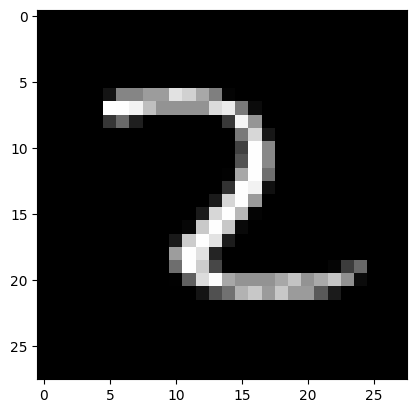

In [48]:
plt.imshow(x_test[2500], cmap='grey')

In [50]:
test_image = x_test[2500].reshape(1, 28, 28, 1)

cnn_model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[2.4377995e-12, 9.9565696e-08, 9.9999988e-01, 3.2852874e-09,
        1.8868235e-16, 9.0903827e-17, 1.2373495e-13, 5.1909360e-10,
        1.5815547e-11, 2.7066413e-15]], dtype=float32)